In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
%matplotlib inline

In [35]:
from utils import *

In [48]:
dataset = LabeledSet(1)

for i in range(0, 50):
    dataset.addExample([random.randint(0,4)],1)
for i in range(0, 50):
    dataset.addExample([random.randint(5, 9)], 2)

In [49]:
np.count_nonzero(dataset.y == 2)

50

In [ ]:
dataset_inf = LabeledSet(1)
dataset_sup = LabeledSet(1)

dataset_inf.addExamples(dataset.x[:50],dataset.y[:50])
dataset_sup.addExamples(dataset.x[50:],dataset.y[50:])

In [39]:
g = Log()
h = Sum()

# rank Shannon discrimination measure
f_r = Dsr()
rsdm = Gdm(h, g, f_r)

# conditional Shannon entropy
f = Ds()
sdm = Gdm(h, g, f)

In [40]:
node = BinaryTree()
node.attribute = 0
node.threshold = 5

inf_leaf = BinaryTree()
inf_leaf.addLeaf(1, dataset_inf)
sup_leaf = BinaryTree()
sup_leaf.addLeaf(2, dataset_sup)

node.inf = inf_leaf
node.sup = sup_leaf

t = RDMT(rsdm, "shannon", 0, 100, 0.1 * dataset.size(), [1, 2])
t.root = node
t.labeled_set = dataset

In [41]:
NMI1(t.labeled_set)

0.0

In [42]:
t.get_ratio_non_monotone_pairs()

0.0

In [43]:
def swap_examples(node):
    inf_set = node.inf.labeled_set
    sup_set = node.sup.labeled_set
    
    while True:
        r1 = np.random.choice(np.arange(0, 50))
        r2 = np.random.choice(np.arange(0, 50))
        y1 = inf_set.getY(r1)[0]
        y2 = sup_set.getY(r2)[0]
        if y1 < y2:
            break
    inf_set.y[r1] = y2
    sup_set.y[r2] = y1
    return inf_set, sup_set

In [44]:
ratio = []
nmi = []
for i in range(0,50):
    if i > 0:
        inf_set, sup_set = swap_examples(t.root)
        t.root.inf.labeled_set = inf_set
        t.root.sup.labeled_set = sup_set
    ratio.append(t.get_ratio_non_monotone_pairs())
    #nmi.append(NMI1(t.labeled_set))

In [45]:
NMI1(dataset)

0.4917171717171717

In [47]:
dataset.x

array([[4],
       [2],
       [0],
       [4],
       [3],
       [1],
       [1],
       [2],
       [2],
       [4],
       [2],
       [4],
       [3],
       [4],
       [4],
       [0],
       [2],
       [2],
       [1],
       [0],
       [3],
       [3],
       [4],
       [1],
       [2],
       [2],
       [1],
       [0],
       [4],
       [4],
       [0],
       [4],
       [0],
       [2],
       [3],
       [2],
       [2],
       [2],
       [4],
       [1],
       [2],
       [1],
       [4],
       [3],
       [2],
       [2],
       [4],
       [4],
       [2],
       [4],
       [7],
       [8],
       [7],
       [9],
       [9],
       [6],
       [5],
       [7],
       [6],
       [9],
       [9],
       [8],
       [6],
       [6],
       [8],
       [6],
       [6],
       [8],
       [8],
       [6],
       [6],
       [8],
       [8],
       [6],
       [9],
       [9],
       [7],
       [9],
       [9],
       [5],
       [7],
       [5],
       [6],
    

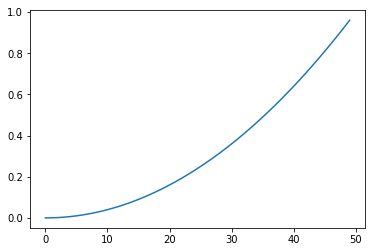

In [29]:
plt.plot(ratio)